In [1]:
import networkx as nx
import numpy as np
import pandas as pd
DG = nx.DiGraph()

In [2]:
import json

file = "/Users/zainabazizzaveri/Downloads/survey_1120.json"
with open(file) as f:
    data = json.load(f)
G = nx.node_link_graph(data, directed = True, multigraph = True, attrs = None)


In [3]:
G.number_of_nodes()

1721

In [4]:
a = G.nodes()
G.nodes['pasta']

{}

In [5]:
import matplotlib.pyplot as plt

In [6]:
#nx.ancestors(G, 'olives')

In [7]:
nx.descendants(G, 'egg')

nx.is_directed_acyclic_graph(G)

False

In [8]:
T = nx.dfs_tree(G, source='pasta', depth_limit=2)

In [9]:
#list(T.edges())

In [10]:
roots = (v for v, d in G.in_degree() if d == 0)
for root in roots:
    all_weights = []
    x = nx.descendants(G,root)
    for item in x:
        if G.has_edge(root,item):
            weight = G.get_edge_data(root, item) 
            all_weights.append(weight['weight'])
    #print(all_weights)
    all_weights.sort(reverse = True)
    divider = sum(all_weights)
    #print(divider)
    for item in x:
        if G.has_edge(root,item):
            G[root][item]['weight'] = G[root][item]['weight']/divider
            #print(G[root][item]['weight'],root,item)

In [11]:
def get_successors(node):
        p = G.successors(node)
        return p

In [12]:
def get_current_sucessors(x,starting_node):
    list_of_weights = []
    list_of_succ = []

    
    for item in x:
        list_of_succ.append(item)
        x1 = G.get_edge_data(starting_node,item) 
        
        if x1 != None:
            list_of_weights.append(x1['weight'])
        else:
            continue
            
    divider = sum(list_of_weights)
    lista.append(starting_node)
    #print(lista)
    
    for item,x in enumerate(list_of_weights):
        list_of_weights[item] = float(x/divider)
        
    if len((list_of_succ))>0:
        node = np.random.choice(np.array(list_of_succ), p=list_of_weights)
        ind = list_of_succ.index(node)
        b = lista[-1]
        
        if b in G:
            if G.has_edge(b,starting_node):
                parentweight1 = G.get_edge_data(b, starting_node)
                a = get_successors(b)

                for item in a:
                    x1 = G.get_edge_data(lista[-1],item)

                    if x1 != None:
                        list_of_weights.append(x1['weight'])
                divider = sum(list_of_weights)
                weightx = (parentweight1['weight']/divider)*list_of_weights[ind]       
            else:
                weightx = 0
        listb = [node, weightx]
        return listb
    else:
        return None

In [13]:
lista = []

In [14]:
starting_node = 'pasta'
list_x = get_successors(starting_node)
list_y = get_successors(starting_node)
freq = {}
montecarlo = 1000

for n in range(montecarlo):
    list_x = get_successors(starting_node)
    listx = get_current_sucessors(list_x,starting_node)
    
    if (listx[0] in freq) and listx[1]>0:
        
        if (h in freq): 
            freq[listx[0]] += 1
        else: 
            freq[listx[0]] = 1

for n in list_y:

    for i in range(montecarlo):
        x = get_successors(n)
       
        if x!= None :
            listx = get_current_sucessors(x,n)
            
            if listx != None:
                
                if (listx[0] in freq) and listx[1]>0: 
                    freq[listx[0]] += 1*listx[1]
                elif listx[1]>0: 
                    freq[listx[0]] = 1*listx[1]
        else:
            break


In [15]:
#del freq[None]

#print(freq)

In [16]:

sorted_d = sorted((value, key) for (key,value) in freq.items())
items= sorted_d[-20:-1]
items

[(20.22692616372397, 'fat'),
 (23.843282541414105, 'pork'),
 (27.219065531777325, 'salad dressing'),
 (29.848448145260775, 'egg'),
 (35.74955011893775, 'broccoli'),
 (37.059043702377465, 'carrots'),
 (55.16701422887167, 'onions'),
 (73.90670433043265, 'beverages'),
 (89.20607836993041, 'chicken'),
 (107.95975974732922, 'margarine-like spread'),
 (199.45633947721228, 'ground beef'),
 (218.79322752945882, 'garlic'),
 (280.99412476854206, 'salt'),
 (412.3493651586247, 'cheese'),
 (448.5104160242647, 'milk'),
 (479.9924900602939, 'crackers'),
 (500.1041495604775, 'nuts'),
 (695.4266937405341, 'butter'),
 (722.9678522970894, 'cream')]

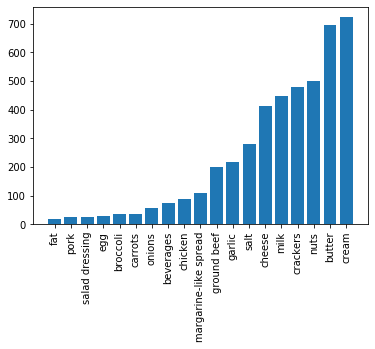

In [18]:
ys, labels = zip(*items)
plt.bar(labels,ys, align='center')
plt.xticks(labels,rotation=90) 
plt.savefig('pastax.png',dpi=1000,quality = 95,bbox_inches = "tight")